<a href="https://colab.research.google.com/github/XM2202-02/CNN-FaceEmo/blob/main/CNNCAMXUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.utils import load_img,img_to_array,to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [79]:
train_face= '/content/drive/MyDrive/TRAIN_FACE_EMO'
val_train= '/content/drive/MyDrive/TRAIN_FACE_EMO'
train_emo= '/content/drive/MyDrive/TRAIN_EMO'
val_emo= '/content/drive/MyDrive/TRAIN_EMO'
train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2,
    brightness_range=[0.8,1.2]
)
val_datagen= ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_generator_face= train_datagen.flow_from_directory(
    train_face,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)
val_generator_face= val_datagen.flow_from_directory(
    val_train,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

train_generator_emo= train_datagen.flow_from_directory(
    train_emo,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

val_generator_emo= val_datagen.flow_from_directory(
    val_emo,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'

)
model_face = Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(train_generator_face.num_classes,activation='softmax')
])
model_emo= Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(train_generator_emo.num_classes,activation='softmax')
])
model_face.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_emo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

x_train, y_train = next(train_generator_face)
x_train=np.expand_dims(x_train,axis=-1)

history_face= model_face.fit(
    train_generator_face,
    epochs=50,
    steps_per_epoch=len(train_generator_face),
    validation_data=val_generator_face,
    validation_steps=len(val_generator_face)
)
history = model_emo.fit(
    train_generator_emo,
    steps_per_epoch=len(train_generator_emo),
    epochs=100,
    validation_data=val_generator_emo,
    validation_steps=len(val_generator_emo)
)


Found 120 images belonging to 5 classes.
Found 120 images belonging to 5 classes.
Found 103 images belonging to 4 classes.
Found 103 images belonging to 4 classes.
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.2789 - loss: 1.5866 - val_accuracy: 0.3750 - val_loss: 1.5173
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.3096 - loss: 1.5642 - val_accuracy: 0.3750 - val_loss: 1.5346
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.3481 - loss: 1.5484 - val_accuracy: 0.3750 - val_loss: 1.5044
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3945 - loss: 1.5221 - val_accuracy: 0.3750 - val_loss: 1.5274
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.3996 - loss: 1.5293 - val_accuracy: 0.3750 - val_loss: 1.4944
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.4074 - loss: 1.4860 - val_accuracy: 0.3750 - val_loss: 1.4774
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.3620 - loss: 1.4639 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Người này đang cảm thấy : Ngạc nhiên


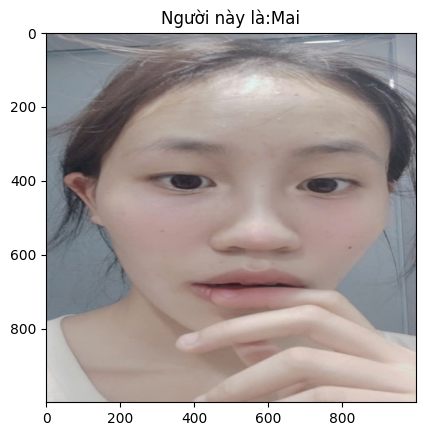

In [108]:
img = load_img('/content/testXMai.jpg', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang cảm thấy :", label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Người này đang : Ngạc nhiên


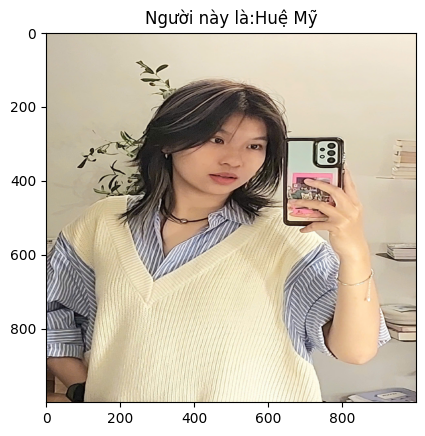

In [117]:
img = load_img('/content/hmu.jpg', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang :", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Người này đang cam thay : Vui


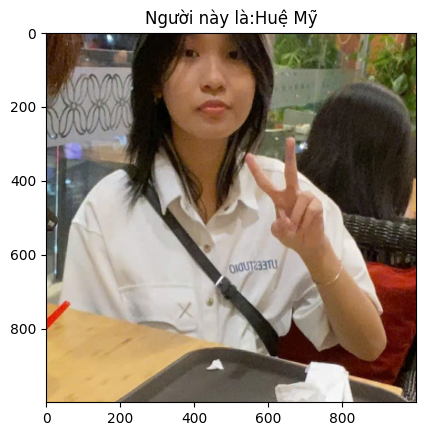

In [123]:
img = load_img('/content/testHueMy.jpg', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang cam thay :", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Người này đang : Ngạc nhiên


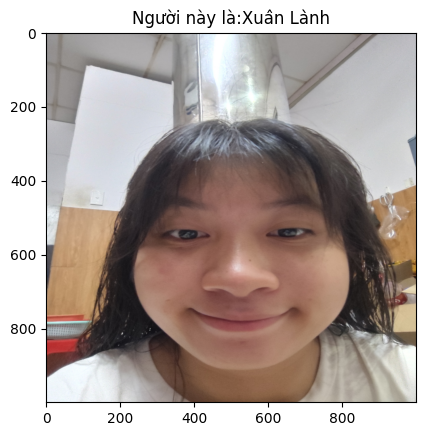

In [78]:
img = load_img('/content/img_1.jpg', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang :", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Người này đang : Vui


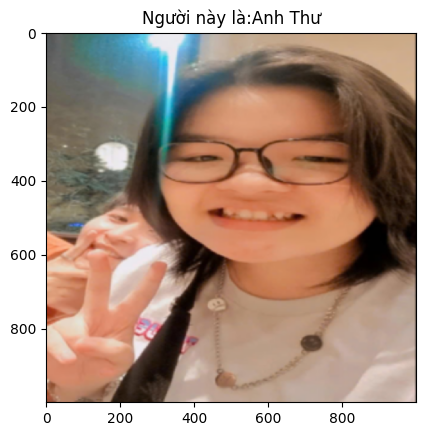

In [25]:
img = load_img('/content/testAnhThu.png', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang :", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Người này đang : Ngạc nhiên


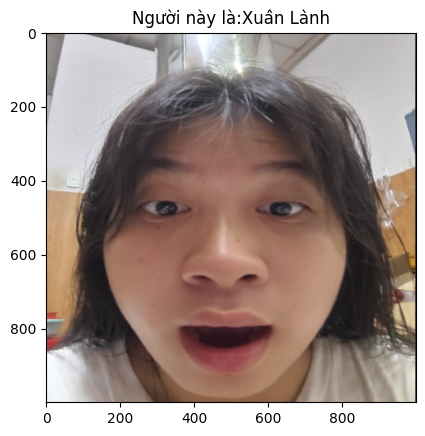

In [26]:
img = load_img('/content/testXuanLanh.png', target_size=(1000, 1000))
plt.imshow(img)
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_face = model_face.predict(img_array)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction_face)]
plt.title(f'Người này là:{predicted_class_face}')

classes = list(train_generator_emo.class_indices.keys())
predicted_emo = model_emo.predict(img_array)
label = classes[np.argmax(predicted_emo)]

print("Người này đang :", label)